In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# création d'une grille régulière

In [2]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

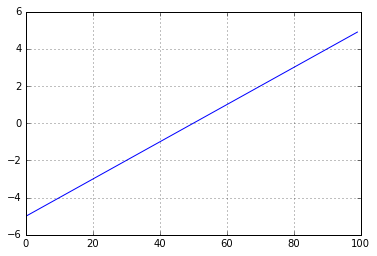

In [3]:
plt.plot(x)
plt.grid()

In [4]:
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

In [5]:
z.shape

(100, 100)

# affichage d'une fonction à deux variables z

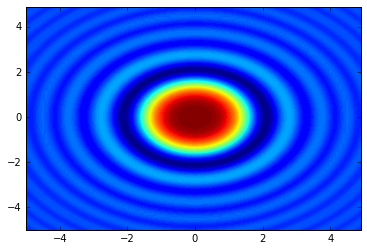

In [6]:
h = plt.contourf(x,y,z,100)

# illustration par un exemple physique : 
illustrer le champ électrique dû à une charge $q_0$ dans le vide

In [7]:
from IPython.display import HTML

In [8]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Cai3AQd2LPs?t=762&rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# calcul du champ dû à une charge à une certaine position de l'espace

In [9]:
from scipy.constants import epsilon_0

def E_field(q0,p0,p):
    "Returns the field(amplitude,angle) at p generated by a charge q0 located p0"
    k_c = 1./(4*np.pi*epsilon_0)
    r = np.asarray(p)-p0
    n = np.linalg.norm(r)
    r_norm = r/n    
    E = k_c*q0/(n**2)
    phi = np.arctan2(r_norm[1], r_norm[0])
    return (E,phi)


In [10]:
q0 = 1
p0 = np.asarray((2.5,2.5))

E_field(q0,p0,(2.5,2.5)) # ! div0 --> (0,0)

/home/olivier/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/olivier/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


(inf, nan)

# calcul du champ en tout point de l'espace

In [11]:
def compute_E(q0,p0,xx,yy):
    E = np.zeros_like(xx)
    phi = np.zeros_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            E[i,j],phi[i,j] = E_field(q0,p0,(xx[i,j],yy[i,j]))
    return E,phi

In [12]:
E,phi = compute_E(q0,p0,xx,yy)


# affichage de la direction du champ

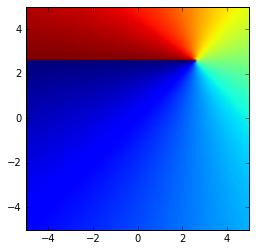

In [13]:
plt.imshow(phi,extent=[-5,5,5,-5]);
plt.gca().invert_yaxis()

# affichage de l'intensité du champ

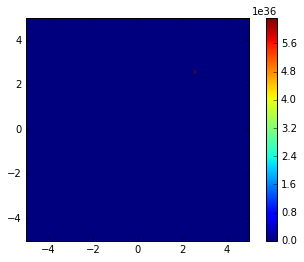

In [14]:
plt.imshow(E,extent=[-5,5,5,-5])
plt.gca().invert_yaxis()
plt.colorbar();

In [15]:
np.min(E),np.max(E)

(79889349.221050456, 6.3294863432442026e+36)

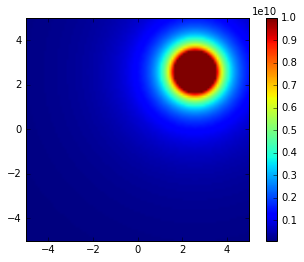

In [16]:
plt.imshow(E,extent=[-5,5,5,-5],vmax=1e10)
plt.gca().invert_yaxis()
plt.colorbar();

# affichage vectoriel

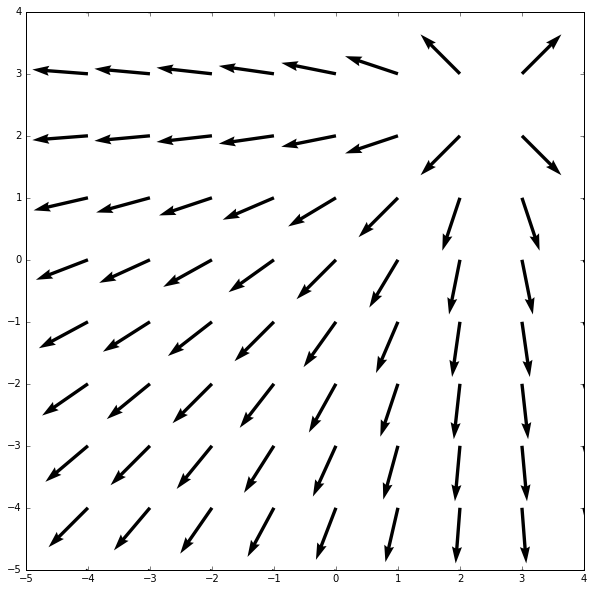

In [17]:
u = np.cos(phi)
v = np.sin(phi)
plt.figure(figsize=[10,10])
plt.quiver(xx[::10,::10],yy[::10,::10],u[::10,::10],v[::10,::10],angles='xy',scale=10)

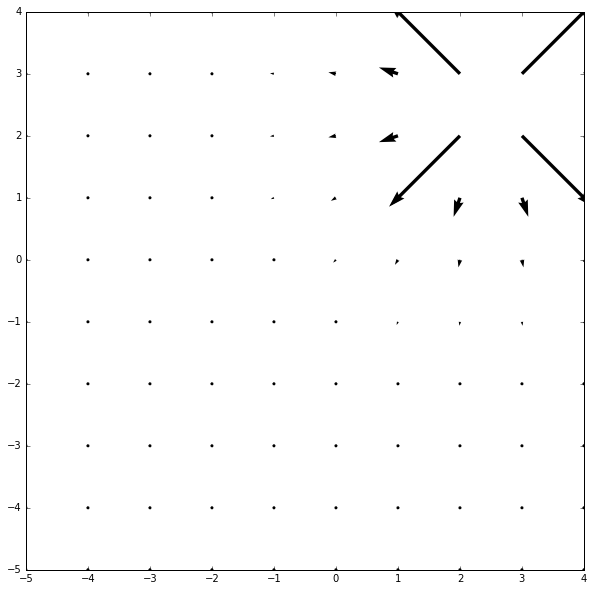

In [18]:
u = E*np.cos(phi)
v = E*np.sin(phi)
plt.figure(figsize=[10,10])
plt.quiver(xx[::10,::10],yy[::10,::10],u[::10,::10],v[::10,::10],angles='xy',scale=1e11);

In [19]:
E

array([[  7.98893492e+07,   8.09616412e+07,   8.20481266e+07, ...,
          1.47119852e+08,   1.46044065e+08,   1.44937136e+08],
       [  8.09616412e+07,   8.20631098e+07,   8.31795630e+07, ...,
          1.50797849e+08,   1.49667807e+08,   1.48505482e+08],
       [  8.20481266e+07,   8.31795630e+07,   8.43268135e+07, ...,
          1.54611247e+08,   1.53423554e+08,   1.52202401e+08],
       ..., 
       [  1.47119852e+08,   1.50797849e+08,   1.54611247e+08, ...,
          9.28466094e+08,   8.87221302e+08,   8.47882244e+08],
       [  1.46044065e+08,   1.49667807e+08,   1.53423554e+08, ...,
          8.87221302e+08,   8.49485046e+08,   8.13353103e+08],
       [  1.44937136e+08,   1.48505482e+08,   1.52202401e+08, ...,
          8.47882244e+08,   8.13353103e+08,   7.80169426e+08]])